In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

The preprocessed dataset is loaded.
We can also view the top 5 rows of the dataset

In [2]:
preprocessed_customer_data = pd.read_csv('datasets/preprocessed_data.csv')

preprocessed_customer_data.head()

,Income,Total_amount_spent,Length_of_Association
0,58138.0,1617.0,101
1,46344.0,27.0,83
2,71613.0,776.0,89
3,26646.0,53.0,83
4,58293.0,422.0,84


In [6]:
preprocessed_customer_data.describe()

,Income,Total_amount_spent,Length_of_Association
count,2216.000000,2216.000000,2216.000000
mean,51751.716832,595.727775,90.539711
std,19773.406544,575.677268,6.762415
min,18985.500000,22.000000,79.000000
25%,35303.000000,69.000000,85.000000
50%,51381.500000,396.500000,91.000000
75%,68522.000000,1048.000000,96.000000
max,84130.000000,1778.250000,102.000000


Scatterplot between the 'Income' and 'Total_amount_spent'is drawn. 

<AxesSubplot:xlabel='Income', ylabel='Total_amount_spent'>

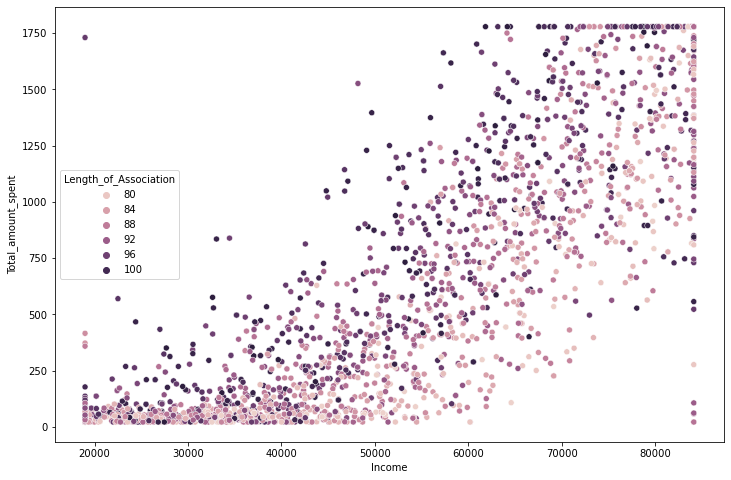

In [11]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'Income', y = 'Total_amount_spent', hue = 'Length_of_Association', 
                data = preprocessed_customer_data)

Before doing clustering, We are scaling and normalising our data

In [12]:
scaler = StandardScaler()

X_std = pd.DataFrame(data = scaler.fit_transform(preprocessed_customer_data),
                    columns = preprocessed_customer_data.columns)

X_std.describe()

,Income,Total_amount_spent,Length_of_Association
count,2.216000e+03,2.216000e+03,2.216000e+03
mean,1.361163e-16,-3.657323e-18,-8.456934e-17
std,1.000226e+00,1.000226e+00,1.000226e+00
min,-1.657459e+00,-9.968385e-01,-1.706834e+00
25%,-8.320483e-01,-9.151771e-01,-8.193762e-01
50%,-1.872719e-02,-3.461536e-01,6.808111e-02
75%,8.483145e-01,7.858123e-01,8.076289e-01
max,1.637836e+00,2.054605e+00,1.695086e+00


In [13]:
X = pd.DataFrame(data = normalize(X_std, norm = 'l2'),
                 columns = X_std.columns)

X.head()

,Income,Total_amount_spent,Length_of_Association
0,0.135946,0.746727,0.651090
1,-0.180570,-0.652287,-0.736150
2,0.933081,0.290900,-0.211510
3,-0.656183,-0.487233,-0.576218
4,0.310416,-0.283174,-0.907444


Scatterplot between variables 'Income' and 'Length_of_Association' is shown and Size of marker shows the Total amount spent.

<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

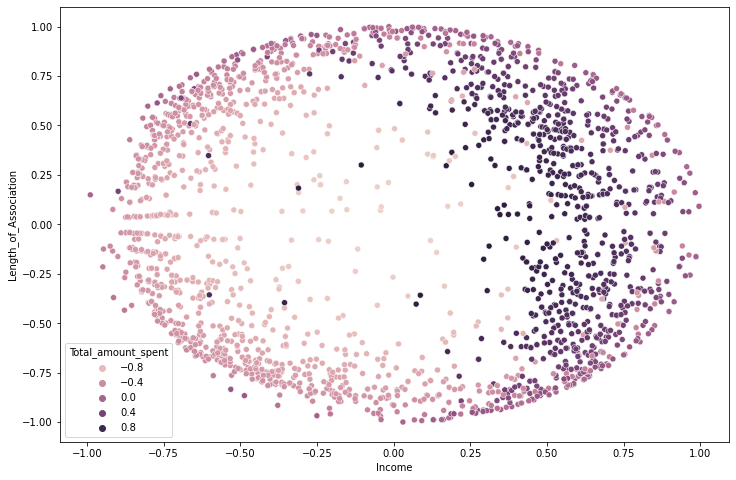

In [14]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'Income', 
                y = 'Length_of_Association', 
                hue = 'Total_amount_spent', data = X)

The weighted cluster sum of squares is calculated for each number of clusters and is plotted in order to find optimal number of clusters for our analysis. 

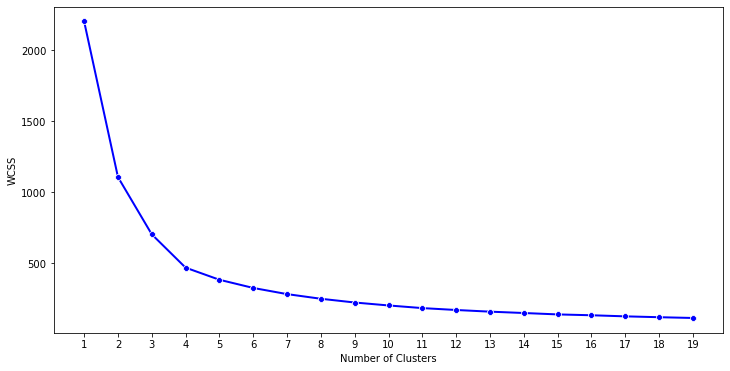

In [16]:
weighted_cluster_sum_of_squares = []

for k in range(1, 20):

    kmeans_model = KMeans(n_clusters = k, random_state = 123)
    
    kmeans_model.fit(X)
    
    weighted_cluster_sum_of_squares.append(kmeans_model.inertia_)
    
plt.figure(figsize = (12, 6))    

sns.lineplot(x = range(1, 20), y = weighted_cluster_sum_of_squares, 
             linewidth = 2, color = 'blue' , marker = '8')

plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1, 20, 1))

plt.ylabel('WCSS')
plt.show()

Another method of finding optimal number of customers is Silhouette score method.

In [17]:
silhouette_avg = []

for num_clusters in range(2, 20):
    
    kmeans_model = KMeans(n_clusters = num_clusters, random_state = 123)
    
    kmeans_model.fit(X)
    
    cluster_labels = kmeans_model.labels_
    
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    
silhouette_avg

[0.4704396189498737,
 0.46691971580477554,
 0.4683471975586241,
 0.43583315127341804,
 0.41627978069320093,
 0.39542766618892744,
 0.40924901603588354,
 0.3816632843762676,
 0.36976922483231983,
 0.3848193617681978,
 0.365865452255577,
 0.3715915398199047,
 0.3497524734957047,
 0.3497939464594913,
 0.3490931154817972,
 0.3484527689149925,
 0.34583826657272204,
 0.3437867006556228]

Silhoutte plot is drawn

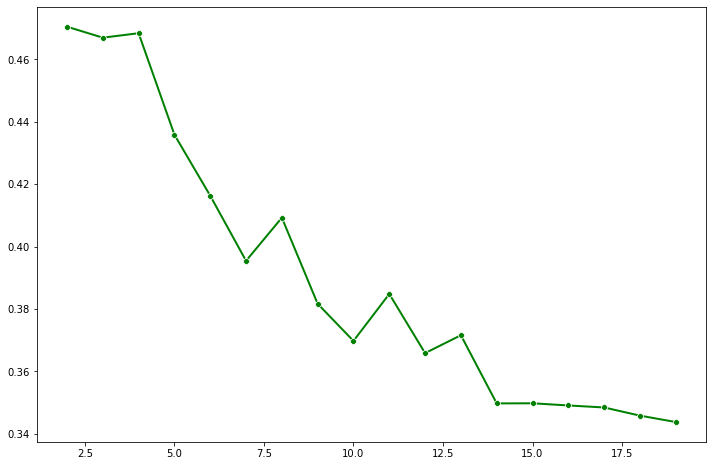

In [18]:
plt.figure(figsize = (12, 8))

sns.lineplot(x = range(2, 20), y = silhouette_avg, 
             linewidth = 2, color = 'green' , marker = '8') 

plt.show()

By analysing the above plots , We have decided to segment customers into 4 clusters and the Data is labelled with corresponding cluster labels

In [49]:
kmeans_model = KMeans(n_clusters = 4, random_state = 123)

kmeans_model.fit(X)

X['cluster_labels'] = kmeans_model.labels_

X.head()

,Income,Total_amount_spent,Length_of_Association,cluster_labels
0,0.135946,0.746727,0.651090,1
1,-0.180570,-0.652287,-0.736150,0
2,0.933081,0.290900,-0.211510,2
3,-0.656183,-0.487233,-0.576218,0
4,0.310416,-0.283174,-0.907444,2


The mean values of Income,Total amount spent, and Length of association are obtained for scaled data for each cluster

In [50]:
X.groupby('cluster_labels').mean()

,Income,Total_amount_spent,Length_of_Association
cluster_labels,,,
0,-0.424636,-0.561632,-0.553556
1,0.468234,0.553998,0.522807
2,0.595593,0.395942,-0.498993
3,-0.496422,-0.490208,0.546616


In [51]:
centers = kmeans_model.cluster_centers_

centers

array([[-4.24635504e-01, -5.61631585e-01, -5.53556141e-01,
        -4.21884749e-15],
       [ 4.68233598e-01,  5.53997912e-01,  5.22806832e-01,
         3.00000000e+00],
       [ 5.95592898e-01,  3.95942292e-01, -4.98993260e-01,
         1.00000000e+00],
       [-4.96422034e-01, -4.90207681e-01,  5.46616030e-01,
         2.00000000e+00]])

The mean values of Income,Total amount spent, and Length of association are obtained for Original unscaled data for each cluster.Clearly Cluster-1 is The Highest Avg Income , High Avg Amount spent and Low Avg Length of Association
Cluster-2 is The Low Avg Income , Lowest Avg Amount spent and Lowest Avg Length of Association.
Cluster-3 is The High Avg Income , Highest Avg Amount spent and Highest Avg Length of Association
Cluster-0 is The Lowest Avg Income , Low Avg Amount spent and High Avg Length of Association

In [52]:
preprocessed_customer_data['cluster_labels'] = kmeans_model.labels_

preprocessed_customer_data.groupby('cluster_labels').mean()

,Income,Total_amount_spent,Length_of_Association
cluster_labels,,,
0,37704.769470,120.211838,84.633956
1,68643.659434,1214.864623,96.626415
2,71769.793177,1047.557569,84.816631
3,35537.686957,187.433043,96.191304


The cluster centroids coordinates are obtained.

Same thing can be visually shown using scatter plot with corresponding centroids shown for each cluster. Cluster centroids are quite far apart in this case

<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

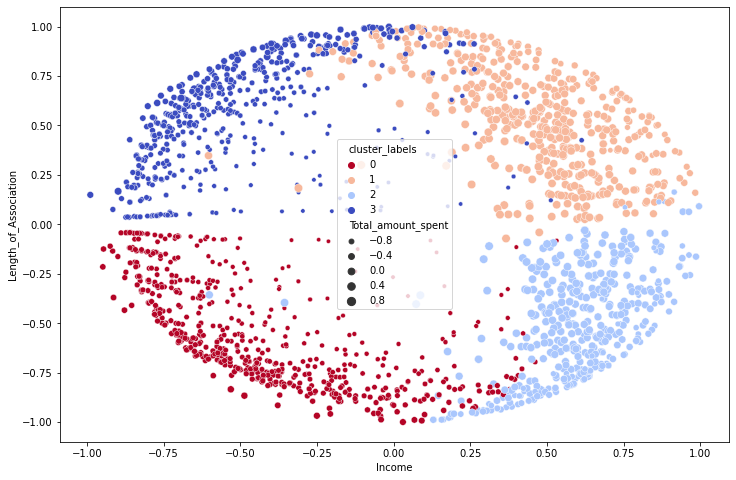

In [53]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'Income', y = 'Length_of_Association', 
                size = 'Total_amount_spent', 
                hue = 'cluster_labels', 
                data = X, palette = 'coolwarm_r')

CLuster groupings in case of original data without scaling and normalisation

<AxesSubplot:xlabel='Income', ylabel='Length_of_Association'>

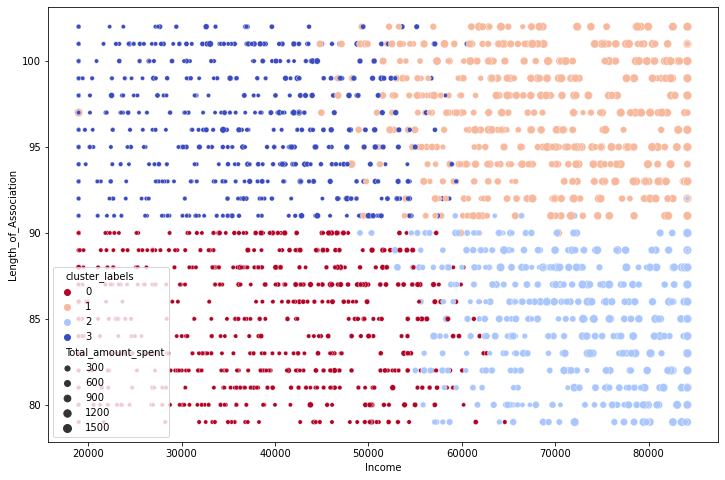

In [54]:
plt.figure(figsize = (12, 8))

sns.scatterplot(x = 'Income',y = 'Length_of_Association', 
                size = 'Total_amount_spent', 
                hue = 'cluster_labels', 
                data = preprocessed_customer_data, 
                palette = 'coolwarm_r')

### TODO Recording

Please rotate the figure and show how the different colors are grouped together

In [55]:
fig = px.scatter_3d(X, x = 'Length_of_Association', y = 'Income', 
                    z = 'Total_amount_spent', color = 'cluster_labels')

fig.show()